In [15]:
from sympy import *
import numpy as np
from scipy.optimize import fsolve


N=8
posiciones_condiciones=[[0,7],[1,7],[3,1],[3,5],[5,7],[6,0],[7,3],[2,0],[2,1],[2,3],[2,5],[2,6],[2,7]]
#posiciones_condiciones=[[0,1],[2,1]]



def comprobar_condiciones(i,j,pos):
    for t in range(len(pos)):
        if pos[t][0]==i and pos[t][1]==j:
            return 0
    return 1

def comprobar(i,j,pos):
    for t in range(len(pos)):
        if pos[t][0]==i and pos[t][1]==j:
            return 0      
    return 1

def evitar_bloqueos(pos):
    for i in range(N):
        m1=m2=0
        pos1=pos2=0
        for j in range(N):
            if i!=j and comprobar(i,j,pos):
                m1+=1
                pos1=j
            if i!=j and comprobar(j,i,pos):
                m2+=1
                pos2=j
        if m1==1:
            for t in range(N):
                if pos1!=t and comprobar_condiciones(t,pos1,pos) and i!=t:
                    pos.append([t,pos1])
        if m2==1:
            for t in range(N):
                if pos2!=t and comprobar_condiciones(pos2,t,pos) and i!=t:
                    pos.append([pos2,t])   

evitar_bloqueos(posiciones_condiciones)

num_condiciones=len(posiciones_condiciones)
num_condiciones_total=2*N
NN=N**2-N-num_condiciones


for i in range(N):
    for j in range(N):
        exec(f"a{i}{j}=symbols('a{i}{j}')")

    
for i in range(num_condiciones_total):
    exec(f"l{i}=symbols('l{i}')")

def orden(i,j):
    s=0
    for k in range(N):
        for t in range(N):
            if i==k and t==j:
                return s
            s+=1

            
           
S=symbols('S')

S=0
media=0
t=0
for i in range(N):
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones):
            exec(f"media+=a{i}{j}")
            t+=1
media=media/t

for i in range(N):
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones):
            #exec(f"S=S+1/(NN-1)*(a{i}{j}-media)**2")
            exec(f"S=S+a{i}{j}*log(a{i}{j})")  
    #xec(f"S=S+l{i}*(a{i}{i})")
    
#for i in range(num_condiciones):
    #exec(f"S=S+l{i+2*N}*(a{posiciones_condiciones[i][0]}{posiciones_condiciones[i][1]})")

        
for i in range(N):
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones) :
            exec(f"S=S+l{i}*(a{i}{j})")
        if i!=j and comprobar(j,i,posiciones_condiciones):
            exec(f"S=S+l{i+N}*(a{j}{i})")
    exec(f"S=S-l{i}-l{i+N}")
#for i in range(num_condiciones):
    #exec(f"S=S-l{posiciones_condiciones[i][0]}*a{posiciones_condiciones[i][0]}{posiciones_condiciones[i][1]}-l{posiciones_condiciones[i][0]+N}*a{posiciones_condiciones[i][0]}{posiciones_condiciones[i][1]}")

for i in range(N):
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones):
            exec(f"A{i}{j}=diff(S,a{i}{j})")
for i in range(num_condiciones_total):
    exec(f"B{i}=diff(S,l{i})")

def func(x):
    sol=[]
    for i in range(N):
        for j in range(N):
            if i!=j and comprobar(i,j,posiciones_condiciones):
                exec(f"sol.append(A{i}{j})")
    for i in range(num_condiciones_total):
        exec(f"sol.append(B{i})")
    for t in range(len(sol)):
        m=0
        for i in range(N):
            for j in range(N):
                if i!=j and comprobar(i,j,posiciones_condiciones):
                    exec(f"sol[t]=sol[t].subs(a{i}{j},"+"x[m]"+")")
                    m+=1

        for i in range(num_condiciones_total):
            exec(f"sol[t]=sol[t].subs(l{i},x[NN+i])")
    return sol

cond_ini=[]
variables=[]
for i in range(N):
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones):
            exec(f"variables.append(a{i}{j})")
for i in range(NN):
    cond_ini.append(1/N)
for i in range(num_condiciones_total):
    cond_ini.append(0.1)
    exec(f"variables.append(l{i})")
    
root=fsolve(func,cond_ini)

   
#root = nsolve(sol,variables, cond_ini)  
root


array([  0.22411584,   0.15291999,   0.22411584,   0.22411584,
         0.1747325 ,   0.214384  ,   0.15483805,   0.2269269 ,
         0.2269269 ,   0.17692415,   1.        ,   0.22545808,
         0.16283626,   0.18606323,   0.42564243,   0.13138991,
         0.1390771 ,   0.09489588,   0.1390771 ,   0.1390771 ,
         0.10843182,   0.24805109,   0.214384  ,   0.2269269 ,
         0.15483805,   0.2269269 ,   0.17692415,   0.18295327,
         0.12483372,   0.18295327,   0.18295327,   0.32630648,
         0.214384  ,   0.2269269 ,   0.15483805,   0.2269269 ,
         0.17692415,   3.31049865,   3.29803377,  23.05697783,
         3.24766835,   3.78763325,   3.29803377,   3.51343094,
         3.29803377,  -2.75804731,  -2.81490642,  -2.43265823,
        -2.81490642, -24.05697783,  -2.81490642,  -2.5659996 ,
        -3.39351271])

In [16]:
m=0
resultado=[]
for i in range(N):
    resultado2=[]
    for j in range(N):
        if i!=j and comprobar(i,j,posiciones_condiciones):
            print(root[m])
            resultado2.append(round(root[m],3))
            m+=1
        else:
            resultado2.append(0)
            print(0)
    resultado.append(resultado2)
    print("")
        

0
0.22411583630238588
0.15291999201115888
0.22411583630238585
0
0.22411583630238593
0.17473249908168342
0

0.21438400301187774
0
0.1548380513538499
0.22692689761633447
0
0.22692689761633442
0.1769241504016035
0

0
0
0
0
1.0
0
0
0

0.2254580787097457
0
0.16283626147395475
0
0
0
0.18606322518147514
0.42564243463482443

0.13138991225462118
0.13907709879106253
0.09489587700256133
0.1390770987910625
0
0.1390770987910625
0.10843182453203092
0.24805108983759913

0.21438400301187774
0.22692689761633444
0.15483805135384984
0.22692689761633447
0
0
0.1769241504016035
0

0
0.18295326967388273
0.12483371545077547
0.18295326967388267
0
0.1829532696738827
0
0.3263064755275765

0.21438400301187766
0.22692689761633444
0.15483805135384981
0
0
0.22692689761633447
0.1769241504016035
0



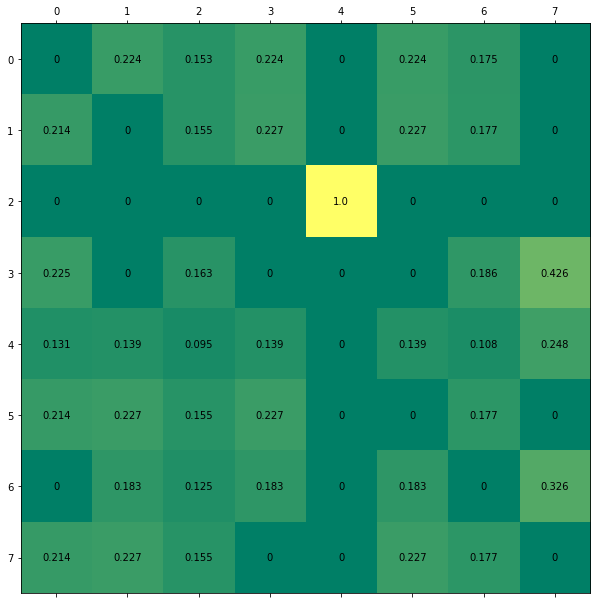

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15.50, 8.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.matshow(resultado, cmap='summer')

for i in range(N):
    for j in range(N):
        c = resultado[j][i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.show()

func(cond_ini)

In [18]:
psm=ax.pcolormesh(resultado)

In [19]:
S.collect(l5).coeff(l5)

a50 + a51 + a52 + a53 + a56 - 1

In [ ]:
A12

In [ ]:
comprobar_condiciones(5,7)

In [ ]:
evitar_bloqueos(posiciones_condiciones)

In [ ]:
posiciones_condiciones

In [ ]:
num_condiciones

In [20]:
OMEGA=[]
a=zeros(N,N)
for i in range(N):
    for j in range(int(-N/2),int(N/2)):
        a[i][i+j]=1
            

TypeError: 'float' object cannot be interpreted as an integer